![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

In [1]:
import tensorflow
tensorflow.__version__

'2.1.0'

#tensorflow.config.run_functions_eagerly(True)# Not required if running in PC

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local
- Control m m for cell to text, Control m y for tesxt to cell

In [3]:
#### Add your code here ####
#from google.colab import drive # comment if you are using local file
#drive.mount('/content/drive')

Mounted at /content/drive


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [3]:
import numpy as np 
#### Add your code here ####
data = np.load('G:/AIML_UTA/12_Computer_Vision/Project/images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [4]:
#### Add your code here ####
print("Data size:", data.shape)
print()
row10col1=data[10][0]
row10col2=data[10][1]
row10col1

Data size: (409, 2)



array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)

In [5]:
row10col2

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}],
  'imageWidth': 600,
  'imageHeight': 337}]

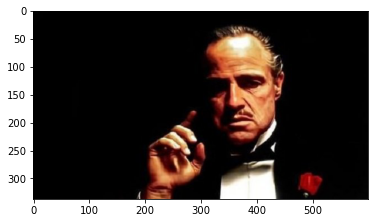

In [6]:
###Plotting 10th image
Tenth_image=data[10][0]
from matplotlib import pyplot as plt
plt.imshow(Tenth_image, cmap='gray')
plt.show()

from PIL import Image
im = Image.fromarray(Tenth_image)
####### this might fail if `img_array` contains a data type that is not supported by PIL, in which case you could try casting it to a different dtype e.g.: im = Image.fromarray(img_array.astype(np.uint8)) but only size-1 arrays can be converted to Python scalars
im.show()

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [7]:
#### Add your code here ####
img_size = 224
IMAGE_HEIGHT = img_size
IMAGE_WIDTH = img_size

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [8]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


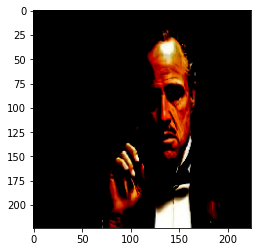

Plotting 10th image after resize


In [9]:
###Plotting 10th image after resize
Tenth_image=X[10]
#from matplotlib import pyplot as plt
plt.imshow(Tenth_image, cmap='gray')
plt.show()
print('Plotting 10th image after resize')

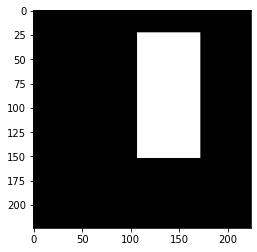

Plotting 10th mask after resize


In [10]:
###Plotting 10th mask after resize
Tenth_mask=masks[10]
#from matplotlib import pyplot as plt
plt.imshow(Tenth_mask, cmap='gray')
plt.show()
print('Plotting 10th mask after resize')

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

In [11]:
X.shape

(409, 224, 224, 3)

In [12]:
masks.shape

(409, 224, 224)

### Split train and test by percentage or size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, masks, test_size=0.022, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, masks, train_size=400, test_size=9, random_state=0)

Training data

In [13]:
X_train = X[0:400]
y_train = masks[0:400]

In [14]:
X_train.shape

(400, 224, 224, 3)

In [15]:
y_train.shape

(400, 224, 224)

Testing data

In [16]:
X_test = X[400:]
y_test = masks[400:]

In [17]:
X_test.shape

(9, 224, 224, 3)

In [18]:
y_test.shape

(9, 224, 224)

### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


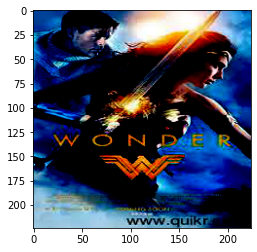

Plotting 9th image from the training set

Array of 9th Image from the training set :


array([[[-0.50588238,  0.25490201,  0.59215689],
        [-0.50588238,  0.25490201,  0.59215689],
        [-0.50588238,  0.25490201,  0.59215689],
        ...,
        [-0.21568626,  0.33333337,  0.67843139],
        [-0.23921567,  0.32549024,  0.67058825],
        [-0.26274508,  0.30980396,  0.66274512]],

       [[-0.50588238,  0.25490201,  0.59215689],
        [-0.50588238,  0.25490201,  0.59215689],
        [-0.50588238,  0.25490201,  0.59215689],
        ...,
        [-0.19215685,  0.35686278,  0.7019608 ],
        [-0.21568626,  0.34117651,  0.68627453],
        [-0.23921567,  0.33333337,  0.67058825]],

       [[-0.50588238,  0.25490201,  0.59215689],
        [-0.50588238,  0.25490201,  0.59215689],
        [-0.50588238,  0.25490201,  0.59215689],
        ...,
        [-0.15294117,  0.38823533,  0.71764708],
        [-0.18431371,  0.37254906,  0.7019608 ],
        [-0.21568626,  0.35686278,  0.68627453]],

       ...,

       [[ 0.6156863 ,  0.78823531,  0.89019608],
        [ 0

In [19]:
###Plotting 9th image from the training set
Ninth_image=X_train[9]
#from matplotlib import pyplot as plt
plt.imshow(Ninth_image, cmap='gray')
plt.show()
print('Plotting 9th image from the training set')
print()
print('Array of 9th Image from the training set :')
X_train[9]

Print the mask

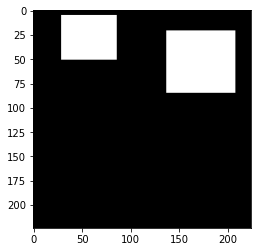

Plotting 9th mask from the training set


In [20]:
###Plotting 9th mask from the training set
Ninth_mask=y_train[9]
#from matplotlib import pyplot as plt
plt.imshow(Ninth_mask, cmap='gray')
plt.show()
print('Plotting 9th mask from the training set')

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False (not to get the last layer from MobileNet)
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [21]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
    #### Add your code here ####
    #block0 = model.get_layer("conv1_pad").output
    block1 = model.get_layer("conv_pw_5_relu").output #getting the layer 5 after relu
    block2 = model.get_layer("conv_pw_11_relu").output #getting the layer 11 after relu
    block3 = model.get_layer("conv_pw_13_relu").output #getting the layer 13 after relu

    x = Concatenate()([UpSampling2D()(block3), block2]) # upsamplig block 3 to block 2 size and concatenate
    x = Concatenate()([UpSampling2D()(x), block1]) # upsamplig x to block 1 size and concatenate
    #x = Concatenate()([UpSampling2D()(x), block0])
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

    return Model(inputs=model.input, outputs=x)
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

In [22]:
input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)
input_shape

(224, 224, 3)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [23]:
model = create_model(False)

17227776/17225924 [==============================] - 5s 0us/step


### Print model summary (2 marks)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [25]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [26]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

es = EarlyStopping(monitor="val_loss", patience=5)

rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [29]:
X_train.shape

(400, 224, 224, 3)

In [30]:
X_test.shape

(9, 224, 224, 3)

In [31]:
y_train.shape

(400, 224, 224)

In [32]:
y_test.shape

(9, 224, 224)

### Resizing the y_train and y_Val to 28X28 to match with the model output 28X28 from model summary and to fit the model with equal dimensions

In [33]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks_resize = np.zeros((int(data.shape[0]), HEIGHT_CELLS, WIDTH_CELLS))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * WIDTH_CELLS)
        x2 = int(i["points"][1]['x'] * WIDTH_CELLS)
        y1 = int(i["points"][0]['y'] * HEIGHT_CELLS)
        y2 = int(i["points"][1]['y'] * HEIGHT_CELLS)
        masks_resize[index][y1:y2, x1:x2] = 1

In [34]:
y_train = masks_resize[0:400]

In [35]:
y_train.shape

(400, 28, 28)

In [36]:
y_test = masks_resize[400:]

In [37]:
y_test.shape

(9, 28, 28)

In [38]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=2, batch_size=1, verbose=1, callbacks=[es, mc, rlr])

Train on 400 samples, validate on 9 samples
Epoch 1/2
399/400 [============================>.] - ETA: 0s - loss: 2.3174 - dice_coefficient: 0.2364
Epoch 00001: val_loss improved from inf to 2.00836, saving model to model-2.01.h5
400/400 [==============================] - 58s 144ms/sample - loss: 2.3174 - dice_coefficient: 0.2362 - val_loss: 2.0084 - val_dice_coefficient: 0.2757
Epoch 2/2
399/400 [============================>.] - ETA: 0s - loss: 1.5704 - dice_coefficient: 0.3551
Epoch 00002: val_loss improved from 2.00836 to 1.49918, saving model to model-1.50.h5
400/400 [==============================] - 36s 91ms/sample - loss: 1.5705 - dice_coefficient: 0.3549 - val_loss: 1.4992 - val_dice_coefficient: 0.3552


### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


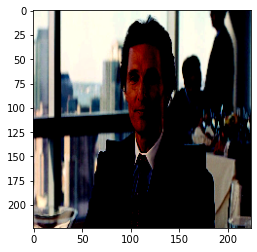

In [39]:
Test_img_3_X=X_test[3]
#from matplotlib import pyplot as plt
plt.imshow(Test_img_3_X, cmap='gray')
plt.show()

Show original mask for test image

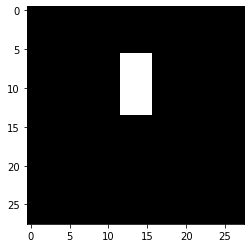

In [40]:
Test_img_3_y=y_test[3]
#from matplotlib import pyplot as plt
plt.imshow(Test_img_3_y, cmap='gray')
plt.show()

Predict the mask on the test image

In [41]:
Pred_img_3=model.predict(X_test)[3]

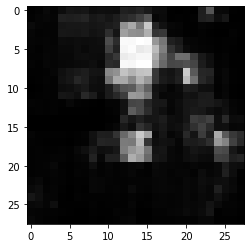

In [42]:
plt.imshow(Pred_img_3, cmap='gray')
plt.show()

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


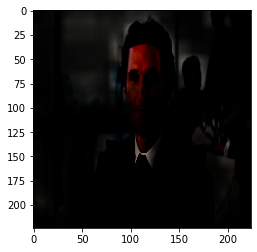

In [43]:
image = X_test[3]

pred_img_3_resize = cv2.resize(Pred_img_3, (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_img_3_resize *image[:,:,0]
image2[:,:,1] = pred_img_3_resize *image[:,:,1]
image2[:,:,2] = pred_img_3_resize *image[:,:,2]

out_image = image2

plt.imshow(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


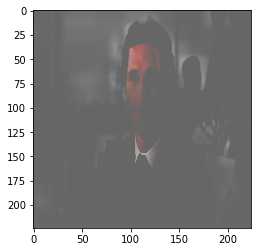

In [44]:
plt.imshow(out_image,alpha=0.6)

Original mask was only covering the man's face in the foreground but the predicted mask is covering the other peoples' face in the background also. This needs to be further studied for matching the prediction mask with the original test image mask.

Overall, the prediction is very reasonable with the callbacks and with 5 epochs though the dice coefficient is only 0.5.

Further improvement in the prediction can be expected by incresing the number of epochs or until earlystopping.